# Benefit of MPL System Modelling

In [1]:
import numpy as np
from copy import deepcopy as dc

from functionfile_system_definition import sys_from_file, system_display_matrix
from functionfile_system_mplcost import cost_function_1, initial_values_init, actuator_selection_cost_1, plot_actuator_selection_1, simulation_actuator_selection, plot_simulation

In [2]:
S_True = sys_from_file('True System')
# system_display_matrix(S_True)
initial_values = initial_values_init(S_True, T=50)

System read from file @ system_model/True System.pickle 



## Control of True System based on Nominal System model

##### Run Code

In [3]:
S_Nominal = sys_from_file('Nominal System')

System read from file @ system_model/Nominal System.pickle 



In [4]:
ret1_nom = actuator_selection_cost_1(S_Nominal, initial_values=initial_values)
S_Nominal = dc(ret1_nom['system'])
# system_display_matrix(S_Nominal)
S_True['B'] = dc(S_Nominal['B'])
ret2_nom = simulation_actuator_selection(S_Nominal, S_True, initial_values=initial_values)

Gain (K):
 [[-0.32210696 -0.32447691 -0.16961602 -0.15784406 -0.1437966  -0.15784406
  -0.16961602 -0.32447691]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]
Gain (K):
 [[-0.29676762 -0.28849755 -0.10457624 -0.06132668 -0.03631819 -0.06132668
  -0.10457624 -0.28849755]
 [-0.03631819 -0.06132668 -0.10457624 -0.28849755 -0.29676762 -0.28849755
  -0.10457624 -0.06132668]
 [ 0.          0.      

##### Display Output

In [5]:
print('Cost change with |S|:\n')
for i in ret2_nom['costs']:
    print('|S|:',i, ' => ', ret2_nom['costs'][i][-1])

Cost change with |S|:

|S|: 1  =>  187584.93988931284
|S|: 2  =>  35280.83302344065
|S|: 3  =>  4690.601656646062
|S|: 4  =>  3108.1439339826443
|S|: 5  =>  2961.1817954713338
|S|: 6  =>  2699.3775370662456
|S|: 7  =>  2517.626710308789
|S|: 8  =>  2210.4860815840507


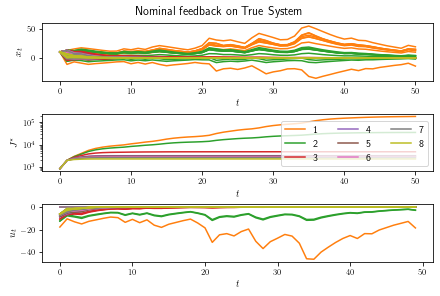

In [6]:
plot_simulation(display_data=ret2_nom, fname='Nominal feedback on True System')

## Control of True System based on MPL System model

##### Run Code

In [7]:
S_MPL = sys_from_file('MPL System')

System read from file @ system_model/MPL System.pickle 



In [8]:
ret1_MPL = actuator_selection_cost_1(S_MPL, initial_values=initial_values)
S_MPL = dc(ret1_MPL['system'])
# system_display_matrix(S_MPL)
S_True['B'] = dc(S_MPL['B'])
ret2_MPL = simulation_actuator_selection(S_MPL, S_True, initial_values=initial_values)

Gain (K):
 [[-0.32210696 -0.32447691 -0.16961602 -0.15784406 -0.1437966  -0.15784406
  -0.16961602 -0.32447691]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]
Gain (K):
 [[-0.29676762 -0.28849755 -0.10457624 -0.06132668 -0.03631819 -0.06132668
  -0.10457624 -0.28849755]
 [-0.03631819 -0.06132668 -0.10457624 -0.28849755 -0.29676762 -0.28849755
  -0.10457624 -0.06132668]
 [ 0.          0.      

##### Display Output

In [9]:
print('Cost change with |S|:\n')
for i in ret2_MPL['costs']:
    print('|S|:',i, ' => ', ret2_MPL['costs'][i][-1])

Cost change with |S|:

|S|: 1  =>  187584.93988931284
|S|: 2  =>  35280.83302344065
|S|: 3  =>  4690.601656646062
|S|: 4  =>  3108.1439339826443
|S|: 5  =>  2961.1817954713338
|S|: 6  =>  2699.3775370662456
|S|: 7  =>  2517.626710308789
|S|: 8  =>  2210.4860815840507


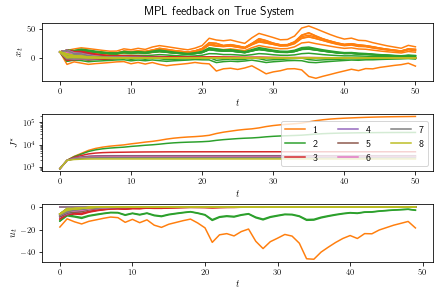

In [10]:
plot_simulation(display_data=ret2_MPL, fname='MPL feedback on True System')

## Self-Control Tests

### Testing Nominal control on itself

##### Run Code

In [11]:
ret3_nom = simulation_actuator_selection(S_Nominal, S_Nominal)

Gain (K):
 [[-0.32210726 -0.32447731 -0.16961668 -0.15784493 -0.14379756 -0.15784493
  -0.16961668 -0.32447731]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]
Gain (K):
 [[-0.29676762 -0.28849755 -0.10457624 -0.06132668 -0.03631819 -0.06132668
  -0.10457624 -0.28849755]
 [-0.03631819 -0.06132668 -0.10457624 -0.28849755 -0.29676762 -0.28849755
  -0.10457624 -0.06132668]
 [ 0.          0.      

##### Display Output

In [12]:
# plot_actuator_selection_1(S_Nominal['B'], ret1_nom['cost_trend'], ret1_nom['time_trend'], ret1_nom['check_trend'], fname='Nominal Actuator Selection')

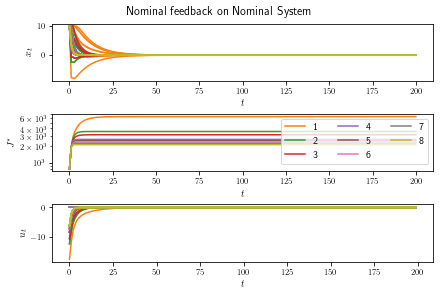

|S|: 1  =>  6404.975838744458
|S|: 2  =>  3540.180525746849
|S|: 3  =>  3108.422013070836
|S|: 4  =>  2587.079868796522
|S|: 5  =>  2456.8490504038004
|S|: 6  =>  2326.1359450454806
|S|: 7  =>  2210.7801403999583
|S|: 8  =>  2094.427190999917


In [13]:
plot_simulation(display_data=ret3_nom, fname='Nominal feedback on Nominal System')
for i in ret3_nom['costs']:
    print('|S|:',i, ' => ', ret3_nom['costs'][i][-1])

### Testing MPL control on itself

##### Run Code

In [14]:
ret3_MPL = simulation_actuator_selection(S_MPL, S_MPL)

Gain (K):
 [[-0.32210726 -0.32447731 -0.16961668 -0.15784493 -0.14379756 -0.15784493
  -0.16961668 -0.32447731]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]
Gain (K):
 [[-0.29676762 -0.28849755 -0.10457624 -0.06132668 -0.03631819 -0.06132668
  -0.10457624 -0.28849755]
 [-0.03631819 -0.06132668 -0.10457624 -0.28849755 -0.29676762 -0.28849755
  -0.10457624 -0.06132668]
 [ 0.          0.      

##### Display Output

In [15]:
# plot_actuator_selection_1(S_MPL['B'], ret1_MPL['cost_trend'], ret1_MPL['time_trend'], ret1_MPL['check_trend'], fname='MPL Actuator Selection')

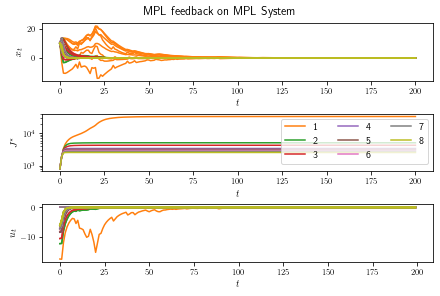

|S|: 1  =>  33222.87935562452
|S|: 2  =>  5111.225359834884
|S|: 3  =>  4278.875331013486
|S|: 4  =>  3403.2558378524745
|S|: 5  =>  3194.5488535945588
|S|: 6  =>  2969.346114221745
|S|: 7  =>  2765.4119184611855
|S|: 8  =>  2558.2303117240235


In [16]:
plot_simulation(display_data=ret3_MPL, fname='MPL feedback on MPL System')
for i in ret3_MPL['costs']:
    print('|S|:',i, ' => ', ret3_MPL['costs'][i][-1])